# <font style = "color:rgb(50,120,229)">Skin Smoothing</font>

In previous modules we have seen how we can use grabcut for detecting skin region given the image of a face. The detected skin can then be smoothened and applied back to the original image, thereby resulting in a skin smoothened image. 

In this project, you will be implementing **Skin Smoothing** but this time the image will contain regions other than face as well and will have to be completely automated.

You can use the following steps to approach this problem:

1. Detect the faces in the image using Deep Learning or HAAR Cascades
2. Iterate over the detected faces and apply smoothing filter. You can experiment with the filter type and size to see which one (or combination) gives the best result.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from dataPath import DATA_PATH
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [3]:
# Read image
img = cv2.imread( "venkatesh.jpg")

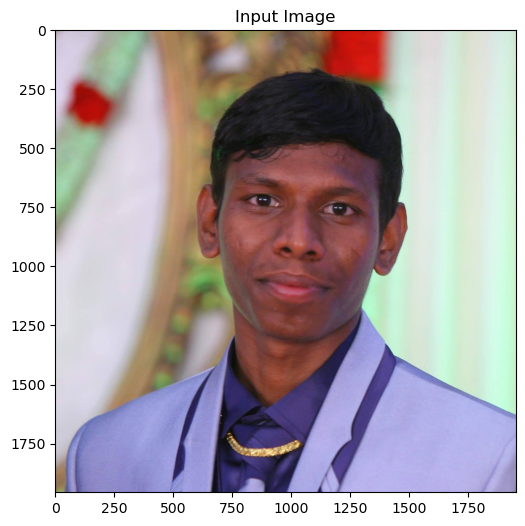

In [4]:
plt.imshow(img[:,:,::-1])
plt.title("Input Image")
plt.show()

In [5]:
# Detect the face using the cascade
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


frame = cv2.imread( "venkatesh.jpg")

frameGray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(frameGray, 1.4, 5)

In [6]:
# Get the face area from the detected face rectangle
for (x, y, w, h) in faces:
    cv2.rectangle(frame, (x, y), 
                  (x + w, y + h), 
                  (255, 0, 0), 2)
    faceRoiGray = frameGray[y: y + h, x: x + w]
    faceRoiOriginal = frame[y: y + h, x: x + w]

count = 1
plt.figure(figsize=(18,18))

<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

In [7]:
def smooth_skin_1(image):
    # Convert image to LAB color model
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

    # Split the LAB image into L, A and B channels
    l_channel, a_channel, b_channel = cv2.split(image_lab)

    # Apply bilateral filter to smoothen the L channel
    l_channel = cv2.bilateralFilter(l_channel, 15, 75, 75)

    # Merge the smoothened L channel with original A and B channel
    image_smooth = cv2.merge([l_channel, a_channel, b_channel])

    # Convert image from LAB color model back to RGB color model
    image_smooth = cv2.cvtColor(image_smooth, cv2.COLOR_Lab2BGR)

    return image_smooth


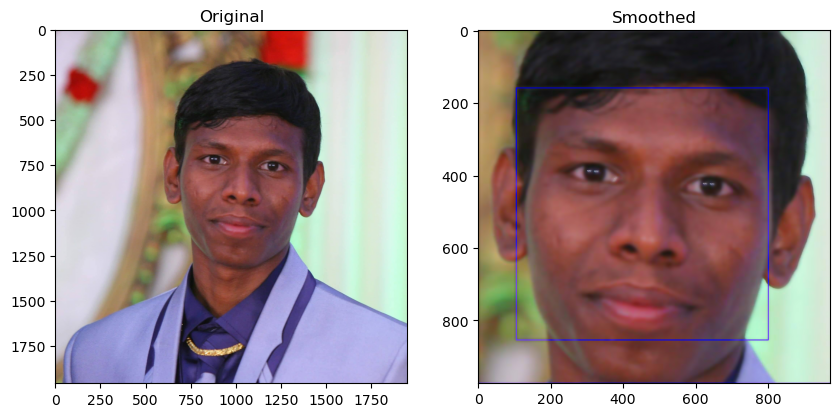

In [8]:
# Apply skin smoothing
img_smooth_1 = smooth_skin_1(faceRoiOriginal )
# Display the original and smoothed images
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(122), plt.imshow(cv2.cvtColor(img_smooth_1, cv2.COLOR_BGR2RGB)), plt.title('Smoothed')
plt.show()

In [9]:

def smooth_skin_2(img):
    # Apply bilateral filter
    # You can experiment with the diameter, sigmaColor, and sigmaSpace parameters
    diameter = 30  # Diameter of each pixel neighborhood
    sigmaColor = 50  # Filter sigma in the color space
    sigmaSpace = 50 # Filter sigma in the coordinate space
    
    return cv2.bilateralFilter(img, diameter, sigmaColor, sigmaSpace)


img = cv2.imread( "venkatesh.jpg")


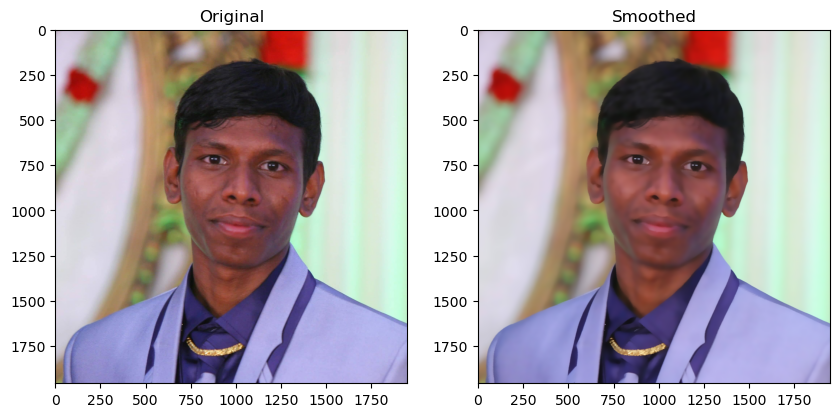

In [10]:
# Apply skin smoothing
img_smooth_2 = smooth_skin_2(img)

# Display the original and smoothed images
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(122), plt.imshow(cv2.cvtColor(img_smooth_2, cv2.COLOR_BGR2RGB)), plt.title('Smoothed')
plt.show()